2803


Text(0.5, 1.0, 'Distribution of Slab Lengths (ft)')

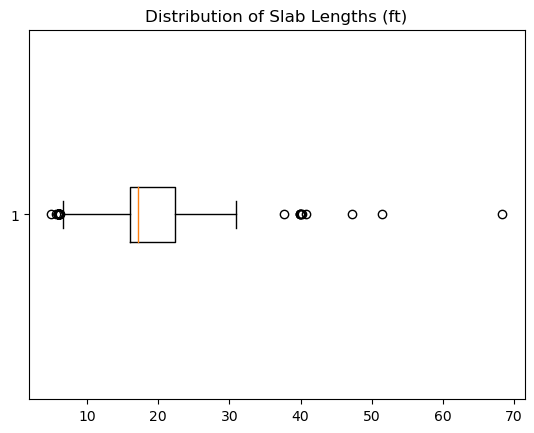

In [76]:
'''
Notebook analyzing how the data should be filtered. Also contains code for tagging slabs that could have been replaced recently.

'''

# Standard suite of data analysis tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
# Machine learning libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('..\..\spreadsheet_data\i16WB_filtered.csv')

plt.boxplot(df['BY Length (ft)'], vert=False)
plt.title('Distribution of Slab Lengths (ft)')


In [71]:
histogram = px.histogram(df, x='BY Length (ft)', nbins=300, title='Distribution of Slab Lengths (ft)')
histogram.update_traces(xbins=dict(
    start=0,
    end=60,
    size=0.1
))

In [72]:
Q1 = df['BY Length (ft)'].quantile(0.25)
Q3 = df['BY Length (ft)'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['BY Length (ft)'] < Q3 + 1.5*IQR) & (df['BY Length (ft)'] > Q1 - 1.5*IQR)]

In [73]:
# # Let's see if K-means gets us anywhere (it doesn't)
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(df[['BY Length (ft)']])
# df['group'] = kmeans.labels_
# df.head()

# data = df['BY Length (ft)']
# plt.scatter(data, np.zeros_like(data), c=df['group'])
# plt.xlabel('Slab Length (ft)')

In [77]:
possible_range = (14.5, 24.5)
print(len(df))
d_2014 = df['2014'].to_numpy()
d_2015 = df['2015'].to_numpy()
d_2016 = df['2016'].to_numpy()
d_2017 = df['2017'].to_numpy()
d_2018 = df['2018'].to_numpy()
lengths = df['BY Length (ft)'].to_numpy()

res = np.zeros(len(lengths))
print(len(lengths))
for i in range(len(lengths)):
    if lengths[i] < possible_range[0]:
        res[i] = 1
    elif lengths[i] > possible_range[1]:
        res[i] = 1
    elif d_2014[i] == 'R':
        res[i] = 1
    elif d_2015[i] == 'R':
        res[i] = 1
    elif d_2016[i] == 'R':
        res[i] = 1
    elif d_2017[i] == 'R':
        res[i] = 1
    elif d_2018[i] == 'R':
        res[i] = 1
    else:
        res[i] = 0


df['possibly_replaced_or_bridge'] = res


df.to_excel('../../spreadsheet_data/i16WB_tag_replaced.xlsx', index=False)

2803
2803


In [75]:
df_filtered = df = pd.read_csv('../spreadsheet_data/i16WB_filtered_encoded.csv')
histogram = px.histogram(df, x='BY Length (ft)', nbins=300, title='Distribution of Slab Lengths (ft)')
histogram.update_traces(xbins=dict(
    start=0,
    end=60,
    size=0.1
))

FileNotFoundError: [Errno 2] No such file or directory: '../spreadsheet_data/i16WB_filtered_encoded.csv'